In [1]:
print("EXERCISE AIRBNB | PYTHON FOR SUSTAINABILITY")
#DISCLAIMER
#Many of the comments are either for clarity or part of my development process to ensure I didn't get lost. 
#In case there are further exercises for us to develop, I would be glad to take on new projects. 
#As of right now, this submission has not been fully completed due to personal timeconstraints. 

EXERCISE AIRBNB | PYTHON FOR SUSTAINABILITY


In [2]:
!pip install matplotlib ipywidgets pandas
!jupyter nbextension enable --py widgetsnbextension
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
An error occurred.
PermissionError: [Errno 13] Permission denied: '/opt/conda/share/jupyter/lab/extensions/jupyter-widgets-jupyterlab-manager-5.0.13.tgz'
See the log file for details:  /tmp/jupyterlab-debug-gi2t1595.log


In [3]:
#Data Analysis and Uploads 
#Merging into dataframe, creating new columns, changing name of some columns
#removing the first column

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
link = "https://docs.google.com/spreadsheets/d/1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY/export/format=xslx"
main_df = pd.ExcelFile(link)

#createddictionary for the countries based on the google sheets
country_dic = {
    "amsterdam": "netherlands",
    "budapest": "hungary",
    "berlin": "germany",
    "barcelona": "spain",
    "rome": "italy",
    "lisbon": "portugal",
    "london": "britain",
    "paris": "france",
    "vienna": "austria",
    
}

overall_dataframes=[] #collect all dataframes in this list

for i in main_df.sheet_names: #so for each sheet name in the main dataframe
    
    current_sheet=pd.read_excel(main_df,sheet_name=i)
    
    #extract information from the titles
    weekpart=i.split('_')[-1] 
    city=i.split('_')[0]
    
    #assign values to specific columns + create the columns
    current_sheet["weekpart"]=weekpart
    current_sheet["city"]=city
    current_sheet["country"] = country_dic.get(city)
    
    overall_dataframes.append(current_sheet)

#create a new dataframe this time with my needed columns and others
newconc_df=pd.concat(overall_dataframes, ignore_index=True)
newconc_df.info() #inspect if all the sheets were connected correctly

#now I rename the column needed
newconc_df.rename(columns={'realSum': 'Price'}, inplace=True)
newconc_df.iloc[:, 1:] #eliminate the first column out of the new merged dataset
newconc_df.style.set_caption("Overview so far") 

display(newconc_df)#showoutcome so far

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  51707 non-null  int64  
 1   realSum                     51707 non-null  float64
 2   room_type                   51707 non-null  object 
 3   room_shared                 51707 non-null  bool   
 4   room_private                51707 non-null  bool   
 5   person_capacity             51707 non-null  int64  
 6   host_is_superhost           51707 non-null  bool   
 7   multi                       51707 non-null  int64  
 8   biz                         51707 non-null  int64  
 9   cleanliness_rating          51707 non-null  int64  
 10  guest_satisfaction_overall  51707 non-null  int64  
 11  bedrooms                    51707 non-null  int64  
 12  dist                        51707 non-null  float64
 13  metro_dist                  517

,Unnamed: 0,Price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekpart,city,country
0,0,194.033698,Private room,False,True,2,False,1,0,10,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam,netherlands
1,1,344.245776,Private room,False,True,4,False,0,0,8,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam,netherlands
2,2,264.101422,Private room,False,True,2,False,0,1,9,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam,netherlands
3,3,433.529398,Private room,False,True,4,False,0,1,9,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam,netherlands
4,4,485.552926,Private room,False,True,2,True,0,0,10,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam,netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,Entire home/apt,False,False,6,False,0,1,10,...,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,weekends,vienna,austria
51703,1795,304.793960,Entire home/apt,False,False,2,False,0,0,8,...,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,weekends,vienna,austria
51704,1796,637.168969,Entire home/apt,False,False,2,False,0,0,10,...,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,weekends,vienna,austria
51705,1797,301.054157,Private room,False,True,2,False,0,0,10,...,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,weekends,vienna,austria


In [4]:
#For Advanced Section
#Create one column with all the private or shared room category
#Calculate number of listings

#PART 1: Check if private or shared 
for row in range(len(newconc_df)):
    if newconc_df.iloc[row]['room_shared']=='TRUE':
        newconc_df.iloc[row, newconc_df.columns.get_loc('room_shared')]='shared'
    else:
        newconc_df.iloc[row, newconc_df.columns.get_loc('room_shared')]='private'
newconc_df.rename(columns={'room_shared': 'room'}, inplace=True)
print(newconc_df.columns) #check to debug 
#now I drop the column that has room_private
newconc_df.drop(columns='room_private', inplace=True)
#I changed the name to room to make it general 
room=newconc_df['room'].head()
display(room) #check alteration
display(newconc_df.head())

#PART 2:Check for one or more listings
#Start checking for duplicates of couples of lng and lat
n_listings = newconc_df.value_counts(['lng', 'lat']).rename('number of listings').reset_index()
newconc_df = newconc_df.merge(n_listings, on=['lng', 'lat'], how='left')
display(newconc_df.head())

Index(['Unnamed: 0', 'Price', 'room_type', 'room', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'weekpart', 'city', 'country'],
      dtype='object')


0    private
1    private
2    private
3    private
4    private
Name: room, dtype: object

,Unnamed: 0,Price,room_type,room,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekpart,city,country
0,0,194.033698,Private room,private,2,False,1,0,10,93,...,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam,netherlands
1,1,344.245776,Private room,private,4,False,0,0,8,85,...,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam,netherlands
2,2,264.101422,Private room,private,2,False,0,1,9,87,...,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam,netherlands
3,3,433.529398,Private room,private,4,False,0,1,9,90,...,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam,netherlands
4,4,485.552926,Private room,private,2,True,0,0,10,98,...,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam,netherlands


,Unnamed: 0,Price,room_type,room,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekpart,city,country,number of listings
0,0,194.033698,Private room,private,2,False,1,0,10,93,...,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam,netherlands,1
1,1,344.245776,Private room,private,4,False,0,0,8,85,...,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam,netherlands,1
2,2,264.101422,Private room,private,2,False,0,1,9,87,...,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam,netherlands,2
3,3,433.529398,Private room,private,4,False,0,1,9,90,...,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam,netherlands,2
4,4,485.552926,Private room,private,2,True,0,0,10,98,...,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam,netherlands,2


In [5]:
#EXPLORATORY QUESTIONS (For Beginners)
#Goal: To determine how many listings per city (per weekend and per day)
countries = list(country_dic.values())
cities = list(country_dic.keys())

#overview per cities (how many listings, how many listings per day type)
for i in cities: 
    print(f"City is:{i}")
    filtered_df = newconc_df[newconc_df['city']==i] #creation of filtered dataframe for each city
    total_city=len(filtered_df) #store in variable the amount of rows
    print(f"The total of listings for this city is:{total_city}")
    #basically when the city value equals to the one we are iterating over > we save it permanently 
    counts_week=filtered_df['weekpart'].value_counts() #here we look into one city and how many weekdays and weekend we have
    print(counts_week)
          

City is:amsterdam
The total of listings for this city is:2080
weekdays    1103
weekends     977
Name: weekpart, dtype: int64
City is:budapest
The total of listings for this city is:4022
weekdays    2074
weekends    1948
Name: weekpart, dtype: int64
City is:berlin
The total of listings for this city is:2484
weekdays    1284
weekends    1200
Name: weekpart, dtype: int64
City is:barcelona
The total of listings for this city is:2833
weekdays    1555
weekends    1278
Name: weekpart, dtype: int64
City is:rome
The total of listings for this city is:9027
weekends    4535
weekdays    4492
Name: weekpart, dtype: int64
City is:lisbon
The total of listings for this city is:5763
weekends    2906
weekdays    2857
Name: weekpart, dtype: int64
City is:london
The total of listings for this city is:9993
weekends    5379
weekdays    4614
Name: weekpart, dtype: int64
City is:paris
The total of listings for this city is:6688
weekends    3558
weekdays    3130
Name: weekpart, dtype: int64
City is:vienna
The 

In [6]:
#EXPLORATORY QUESTIONS
#Goal 2: To determin which city has the biggest proportion of superhosts? 
#Formula used: total superhosts/(total_city)
city_perc={}

for i in cities: 
    filtered_df=newconc_df[newconc_df['city']==i]
    counts_superhosts=filtered_df['host_is_superhost'].value_counts() #calculate the total amount per country
    get_onlysuperhost=counts_superhosts.get(True, 0) #take only superhost total
    total_percentage=get_onlysuperhost/total_city #I calculate the weighted percentage
    city_perc[i]=total_percentage #assign to dictionary to access later
    
#from dictionary to series
city_perc_series = pd.Series(city_perc)
top_1city = city_perc_series.nlargest(1)

print(f"The city with the highest rate of SUPERHOSTS is : {top_1city}")

The city with the highest rate of SUPERHOSTS is : rome    0.833757
dtype: float64


In [7]:
#EXPLORATORY QUESTIONS
#Goal 3: Determining which city has listings with more than 4 rooms
#PS: I used a similar pattern to the previous exercises
city_more4={}

for i in cities: 
        filtered2_df=newconc_df[(newconc_df['city']==i) & (newconc_df['bedrooms'] <= 4)]
        if len(filtered2_df) > 0:  # Check only if there are
            city_more4[i] = len(filtered2_df)
            print(f"{i}")
        else:
            print(f"{i} is not included among the cities with more than 4 bedrooms")



amsterdam
budapest
berlin
barcelona
rome
lisbon
london
paris
vienna


In [8]:
#EXPLORATORY QUESTIONS
#Goal 4: Determining which city has the most values entire home/apt
city_highhome={}

for i in cities: 
    filtered_df=newconc_df[newconc_df['city']==i]
    counts_homeapt=filtered_df['room_type'].value_counts()
    get_onlyhouse=counts_homeapt.get('Entire home/apt', 0) #select only apartment
    city_highhome[i]=get_onlyhouse #assign to dictionary to access later
    
#from dictionary to series
city_highhome_series = pd.Series(city_highhome)
top_homes = city_highhome_series.nlargest(1)

print(top_homes)

rome    5561
dtype: int64


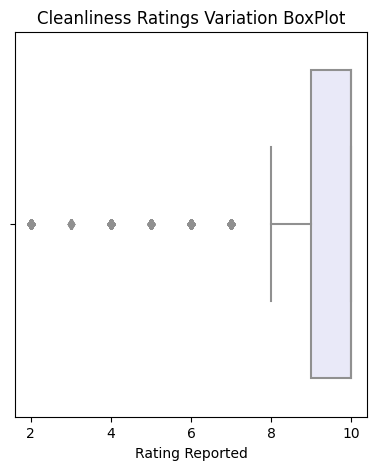

The average cleaning rate was : 9.39062409344963
The median cleaning rate was : 10.0
Range of Ratings: 8
Therefore, we can notice a high quantity of outliers but a predominant concentration towards the positive clean ratings


In [9]:
#EXPLORATORY QUESTIONS
#Goal 5: Are ratings typically high across listings, or is there a wide variation? 
#Thus, I had to determine also the variation in itself

def calculate_rating():
    mean_rating = newconc_df['cleanliness_rating'].mean()
    median_rating = newconc_df['cleanliness_rating'].median()
    std_dev_rating = newconc_df['cleanliness_rating'].std()
    max_rating = newconc_df['cleanliness_rating'].max()
    min_rating = newconc_df['cleanliness_rating'].min()

    plt.figure(figsize=(10, 5)) 
    plt.subplot(1, 2, 2)
    sns.boxplot(x=newconc_df['cleanliness_rating'], color="#E6E6FA")
    plt.title('Cleanliness Ratings Variation BoxPlot')
    plt.xlabel('Rating Reported')
    plt.show()
    print(f"The average cleaning rate was : {mean_rating}")
    print(f"The median cleaning rate was : {median_rating}")
    print(f"Range of Ratings: {max_rating - min_rating}")
    print("Therefore, we can notice a high quantity of outliers but a predominant concentration towards the positive clean ratings")
    
calculate_rating()

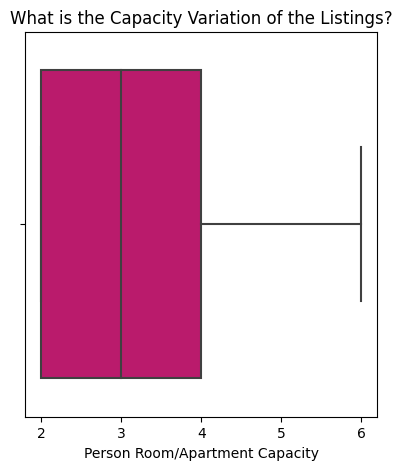

The average capacity rate was : 3.1616608969771987
The median capacity rate was : 3.0
Range of Capacity: 4


In [10]:
#EXPLORATORY QUESTIONS
#Goal 6: How does person_capacity vary across listings? What is the most common capacity of listings?
def calculate_capac():
    mean_rating = newconc_df['person_capacity'].mean()
    median_rating = newconc_df['person_capacity'].median()
    std_dev_rating = newconc_df['person_capacity'].std()
    max_rating = newconc_df['person_capacity'].max()
    min_rating = newconc_df['person_capacity'].min()

    plt.figure(figsize=(10, 5)) 
    plt.subplot(1, 2, 2)
    sns.boxplot(x=newconc_df['person_capacity'],color='#D5006D')
    plt.title('What is the Capacity Variation of the Listings?')
    plt.xlabel('Person Room/Apartment Capacity')
    plt.show()
    print(f"The average capacity rate was : {mean_rating}")
    print(f"The median capacity rate was : {median_rating}")
    print(f"Range of Capacity: {max_rating - min_rating}")
    
calculate_capac()


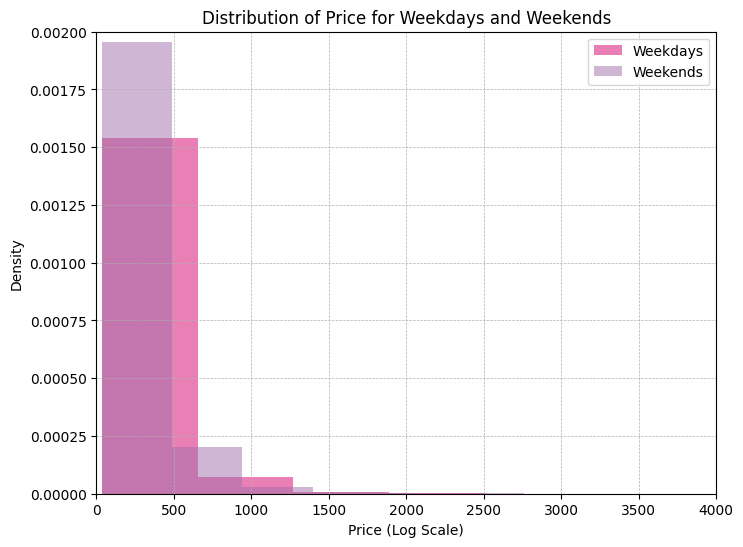

There is a higher presence of listings under 500 euros a night. For this reason the graph is more concentrated to the left and therefore is right-skewed.


In [11]:
#EXPLORATORY QUESTIONS
#Goal 7: To plot the distribution within a histogram of the Price or realSum
weekdays_data = newconc_df[newconc_df["weekpart"] == "weekdays"]["Price"]
weekend_data = newconc_df[newconc_df["weekpart"] == "weekends"]["Price"]

plt.figure(figsize=(8, 6))

plt.hist(weekdays_data, bins=30, alpha=0.5, color='#D5006D', label='Weekdays', density=True)
plt.hist(weekend_data, bins=30, alpha=0.5, color='#A16EAB', label='Weekends', density=True)

# Labels & Title
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Distribution of Price for Weekdays and Weekends")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

#Set borders to zoom into the interesting data
plt.xlim(0, 4000)
plt.ylim(0, 0.002)

# Show Plot
plt.show()
print("There is a higher presence of listings under 500 euros a night. For this reason the graph is more concentrated to the left and therefore is right-skewed.")


NameError: name 'satisfaction_data_weekends' is not defined

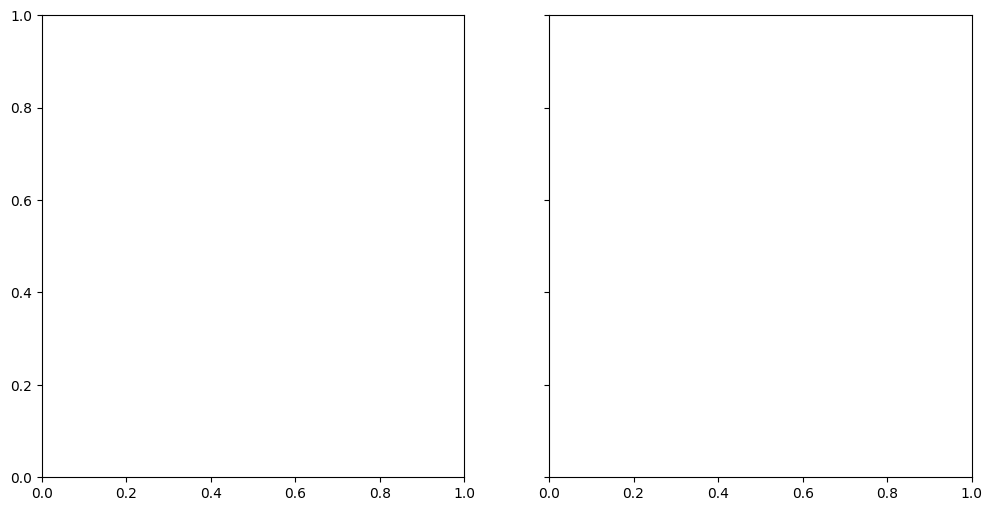

In [27]:
#EXPLORATORY QUESTIONS
#Goal 8: To plot the distribution of Guest satisfaction
satisfaction_data_days = newconc_df[newconc_df["weekpart"] == "weekdays"]["guest_satisfaction_overall"]
satisfaction_data_ed = newconc_df[newconc_df["weekpart"] == "weekends"]["guest_satisfaction_overall"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# For weekends
axes[1].hist(satisfaction_data_weekends, bins=30, alpha=0.7, color='#A16EAB', density=True)
axes[1].set_title("Weekends Satisfaction")
axes[1].set_xlabel("Guest Satisfaction")
axes[1].grid(True, linestyle="--", linewidth=0.5)
axes[1].set_xlim(0, 300)

# Plot weekdays
axes[0].hist(satisfaction_data_weekdays, bins=30, alpha=0.7, color='#D5006D', density=True)
axes[0].set_title("Weekdays Satisfaction")
axes[0].set_xlabel("Guest Satisfaction")
axes[0].set_ylabel("Density")
axes[0].grid(True, linestyle="--", linewidth=0.5)
axes[0].set_xlim(0, 300)
axes[0].set_ylim(0, 0.015)

plt.tight_layout()
plt.show()


In [13]:
#EXERCISE 1: Understanding the difference between three cities
#Chosen cities: Vienna, Rome, Berlin
def cal_price_stats(df, city):
    city_df = df[df['city'] == city]  # Filter data by city
    
    # Weekdays stats
    weekdays_prices = city_df[city_df["weekpart"] == "weekdays"]["Price"]
    avg_weekday = weekdays_prices.mean()
    median_weekday = weekdays_prices.median()

    # Weekends stats
    weekend_prices = city_df[city_df["weekpart"] == "weekends"]["Price"]
    avg_weekend = weekend_prices.mean()
    median_weekend = weekend_prices.median()

    # General stats
    avg_general = city_df["Price"].mean()
    median_general = city_df["Price"].median()

    print(f" {city} Price Statistics:")
    print(f"   ➤ Weekday Avg: {avg_weekday:.2f}, Median: {median_weekday:.2f}")
    print(f"   ➤ Weekend Avg: {avg_weekend:.2f}, Median: {median_weekend:.2f}")
    print(f"   ➤ General Avg: {avg_general:.2f}, Median: {median_general:.2f}")

cal_price_stats(newconc_df, "vienna")
cal_price_stats(newconc_df, "rome")
cal_price_stats(newconc_df, "berlin")

 vienna Price Statistics:
   ➤ Weekday Avg: 240.38, Median: 204.52
   ➤ Weekend Avg: 242.74, Median: 212.00
   ➤ General Avg: 241.58, Median: 208.49
 rome Price Statistics:
   ➤ Weekday Avg: 201.62, Median: 179.79
   ➤ Weekend Avg: 209.13, Median: 184.46
   ➤ General Avg: 205.39, Median: 182.59
 berlin Price Statistics:
   ➤ Weekday Avg: 240.22, Median: 187.79
   ➤ Weekend Avg: 249.25, Median: 192.46
   ➤ General Avg: 244.58, Median: 191.18


 vienna Price Statistics:
   ➤ Weekday Median: 204.52
   ➤ Weekend Median: 212.00
   ➤ General Median: 208.49
--------------------------------------------------


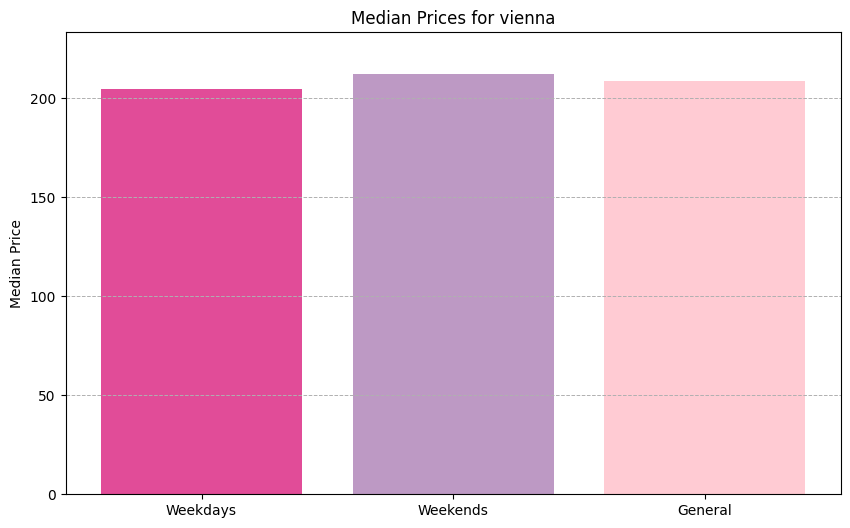

 rome Price Statistics:
   ➤ Weekday Median: 179.79
   ➤ Weekend Median: 184.46
   ➤ General Median: 182.59
--------------------------------------------------


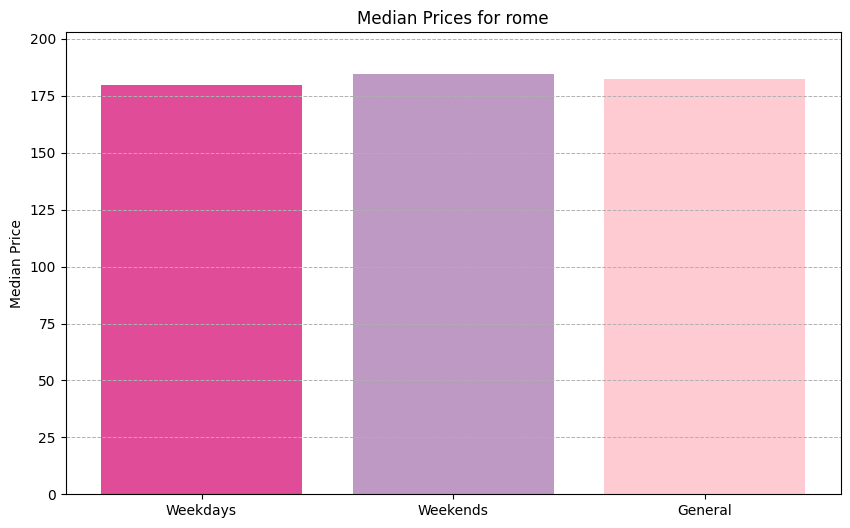

 berlin Price Statistics:
   ➤ Weekday Median: 187.79
   ➤ Weekend Median: 192.46
   ➤ General Median: 191.18
--------------------------------------------------


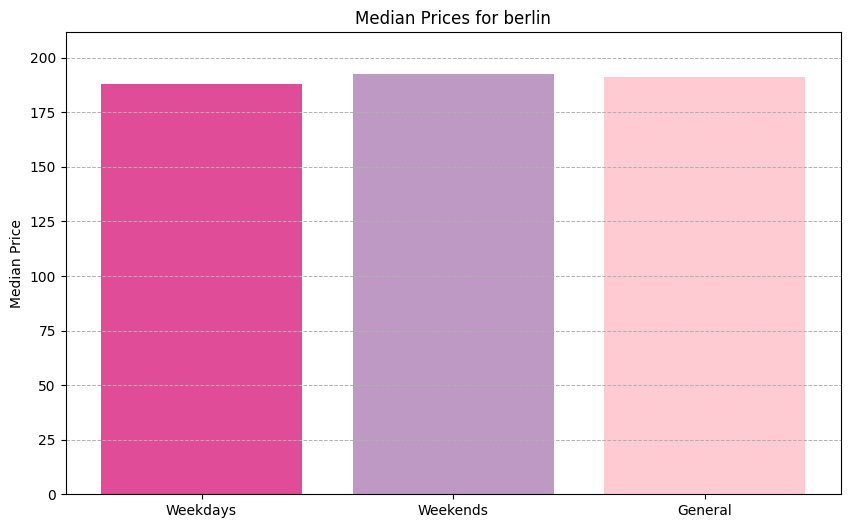

Thus, prices seem to be slightly higher on weekends although this seems to be a bit more pronounced for Vienna compared to other cities.


In [14]:
#EXERCISE 2
#Do prices tend to be more expensive in the weekend or during the week? 
def cal_price_stats_and_plot(df, city):
    city_df = df[df['city'] == city] 
    
    weekdays_prices = city_df[city_df["weekpart"] == "weekdays"]["Price"].dropna()
    median_weekday = weekdays_prices.median()

    weekend_prices = city_df[city_df["weekpart"] == "weekends"]["Price"].dropna()
    median_weekend = weekend_prices.median()

    general_prices = city_df["Price"].dropna()
    median_general = general_prices.median()

    # Print statistics (help of Chat gpt in the line formatting)
    print(f" {city} Price Statistics:")
    print(f"   ➤ Weekday Median: {median_weekday:.2f}")
    print(f"   ➤ Weekend Median: {median_weekend:.2f}")
    print(f"   ➤ General Median: {median_general:.2f}")
    print("-" * 50)

    # Plotting the median prices
    categories = ['Weekdays', 'Weekends', 'General']
    median_prices = [median_weekday, median_weekend, median_general]

    plt.figure(figsize=(10, 6))
    plt.bar(categories, median_prices, color=['#D5006D', '#A16EAB', '#FFB6C1'], alpha=0.7)
    
    # Adding labels and title
    plt.ylabel('Median Price')
    plt.title(f'Median Prices for {city}')
    plt.ylim(0, max(median_prices) * 1.1)  # Set y-axis limit to a bit above max median
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    
    # Show the plot
    plt.show()

# Call the function for specific cities
cal_price_stats_and_plot(newconc_df, "vienna")
cal_price_stats_and_plot(newconc_df, "rome")
cal_price_stats_and_plot(newconc_df, "berlin")
print("Thus, prices seem to be slightly higher on weekends although this seems to be a bit more pronounced for Vienna compared to other cities.")

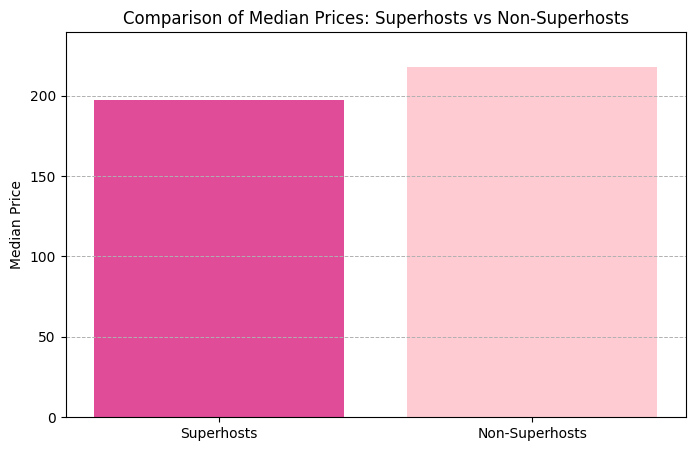

In [15]:
#EXERCISE 3
#Goal: Compare superhost prices to non superhosts prices (overall)
def compare_superhost_prices(df):
    # I filtered based on superhost or not
    superhosts = df[df['host_is_superhost'] == True]['Price']
    non_superhosts = df[df['host_is_superhost'] == False]['Price']
    
    median_superhost = superhosts.median()
    median_non_superhost = non_superhosts.median()

    categories = ['Superhosts', 'Non-Superhosts']
    median_prices = [median_superhost, median_non_superhost]

    plt.figure(figsize=(8, 5))
    plt.bar(categories, median_prices, color=['#D5006D', '#FFB6C1'], alpha=0.7)

    plt.ylabel('Median Price')
    plt.title('Comparison of Median Prices: Superhosts vs Non-Superhosts')
    plt.ylim(0, max(median_prices) * 1.1) #asked chat gpt to set the measure correctly
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    
    plt.show()

compare_superhost_prices(newconc_df)

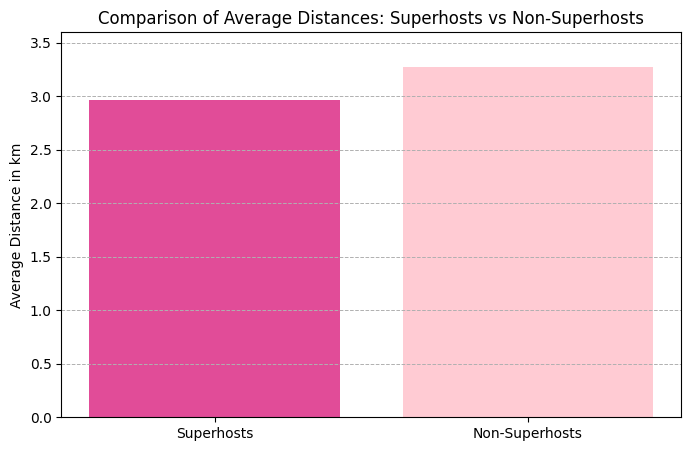

Therefore, one of the benefits of choosing superhosts seem to be the proximity to the city center.
We might want to consider also the opposite association; Superhosts might be so thanks to their proximity to highly visited locations.


In [16]:
#EXERCISE 4 
#Goal/Question: Are superhosts closer or not to the city center and metro station? 
superhosts = newconc_df[newconc_df['host_is_superhost'] == True]['dist']
non_superhosts = newconc_df[newconc_df['host_is_superhost'] == False]['dist']

median_superhost = superhosts.mean()
median_non_superhost = non_superhosts.mean()

categories = ['Superhosts', 'Non-Superhosts']
median_prices = [median_superhost, median_non_superhost]

plt.figure(figsize=(8, 5))
plt.bar(categories, median_prices, color=['#D5006D', '#FFB6C1'], alpha=0.7)

plt.ylabel('Average Distance in km')
plt.title('Comparison of Average Distances: Superhosts vs Non-Superhosts')
plt.ylim(0, max(median_prices) * 1.1) #asked chat gpt to set the measure correctly
plt.grid(axis='y', linestyle='--', linewidth=0.7)
    
plt.show()
print("Therefore, one of the benefits of choosing superhosts seem to be the proximity to the city center.")
print("We might want to consider also the opposite association; Superhosts might be so thanks to their proximity to highly visited locations.")

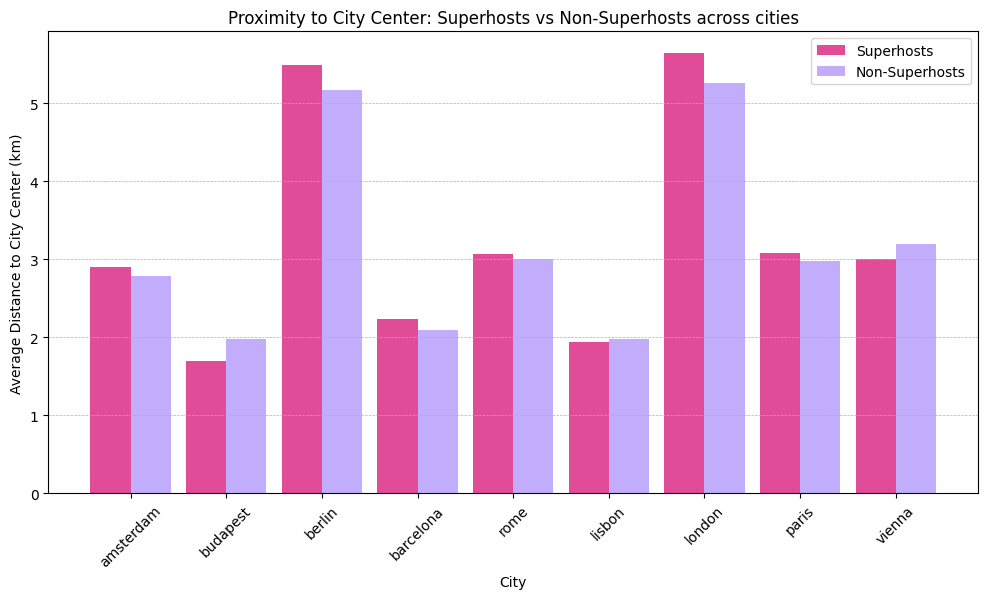

The cities where the proximity to the city center seems to pay a bigger relevance are: Berlin, London, and Budapest


In [17]:
#EXERCISE 4
#What if we would like to have a city overview?
#Which cities seem to have more listings closer to the city centers? 
import numpy as np
def compare_proximity_city(df):
    
    superhost_distances = []  # List to store avg distances for superhosts
    non_superhost_distances = []  # List to store avg distances for non-superhosts

    # Loop through each city and calculate average distances
    for city in cities:
        city_df = df[df['city'] == city]  # Filter data for the current city
        
        #Divide and calculat
        superhost_avg = city_df[city_df['host_is_superhost'] == True]['dist'].mean()
        non_superhost_avg = city_df[city_df['host_is_superhost'] == False]['dist'].mean()
        
        # Append to lists
        superhost_distances.append(superhost_avg)
        non_superhost_distances.append(non_superhost_avg)

    x = np.arange(len(cities))
    width = 0.42
    
    plt.figure(figsize=(12, 6))
    plt.bar(x - width/2, superhost_distances, width, label='Superhosts', color='#D5006D', alpha=0.7)
    plt.bar(x + width/2, non_superhost_distances, width, label='Non-Superhosts', color='#A78BFA', alpha=0.7)

    plt.xlabel("City")
    plt.ylabel("Average Distance to City Center (km)")
    plt.title("Proximity to City Center: Superhosts vs Non-Superhosts across cities")
    plt.xticks(ticks=x, labels=cities, rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', linewidth=0.5)

    plt.show()

compare_proximity_city(newconc_df)

print("The cities where the proximity to the city center seems to pay a bigger relevance are: Berlin, London, and Budapest")

       Unnamed: 0       Price        room_type     room  person_capacity  \
0               0  194.033698     Private room  private                2   
1               1  344.245776     Private room  private                4   
2               2  264.101422     Private room  private                2   
3               3  433.529398     Private room  private                4   
4               4  485.552926     Private room  private                2   
...           ...         ...              ...      ...              ...   
51702        1794  715.938574  Entire home/apt  private                6   
51703        1795  304.793960  Entire home/apt  private                2   
51704        1796  637.168969  Entire home/apt  private                2   
51705        1797  301.054157     Private room  private                2   
51706        1798  133.230489     Private room  private                4   

       host_is_superhost  multi  biz  cleanliness_rating  \
0                  False   

Button(description='View other comparisons', style=ButtonStyle())

/opt/conda/lib/python3.10/site-packages/numpy/lib/stride_tricks.py:538: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: setting an array element with a sequence.

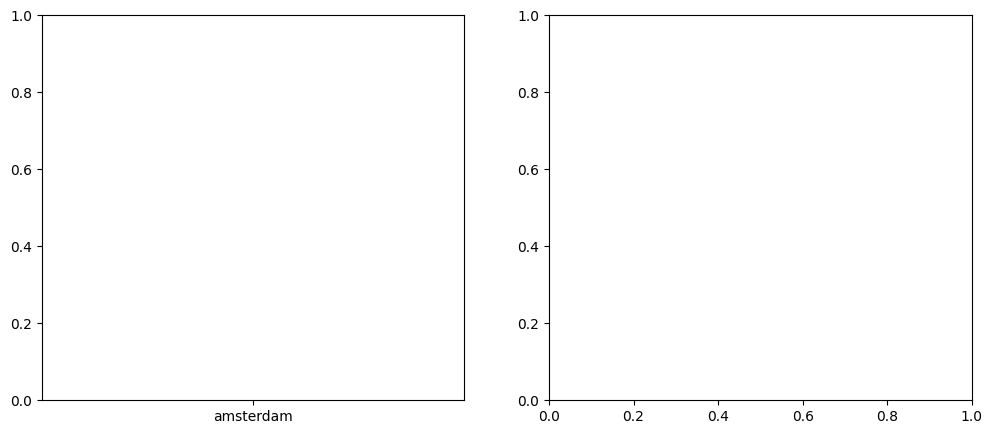

In [19]:
#EXERCISE 6
#Goal: Is there a pattern between room type and superhost status? 

#Check on average what percentage of superhosts properties are houses or rooms ect
#Check the same for non-superhosts  (In general for all of them)
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

#from previous code
country_dic = {
    "amsterdam": "netherlands",
    "budapest": "hungary",
    "berlin": "germany",
    "barcelona": "spain",
    "rome": "italy",
    "lisbon": "portugal",
    "london": "britain",
    "paris": "france",
    "vienna": "austria",
    
}
cities = list(country_dic.keys()) #reminder from previous code
print(newconc_df)

def compare_roomtype(df):
    
    superhost_room = [] 
    non_superhost_room = []
    
    superhost_apt=[]
    non_superhost_apt=[]
    
    # Loop through each city and calculate average distances
    for city in cities:
        city_df = df[df['city'] == city]  # Filter data for the current city
        #Graph: differentiate based on apartment or room (underneath superhost vs non superhost)

        #Divide and calculate only with riferimento to home
        superhost_prop = city_df[city_df['host_is_superhost'] == True]['room_type'].value_counts()
        get_onlyhouse=superhost_prop.get('Entire home/apt', 0) #select only homes
        non_superhost_prop = city_df[city_df['host_is_superhost'] == False]['room_type'].value_counts()
        tot_onlyhouse=non_superhost_prop.get('Entire home/apt', 0) 
        perc_house_sup=(get_onlyhouse/superhost_prop)*100 if superhost_prop.sum() > 0 else 0 #percentage of properties that are houses
        perc_house_nonsp=(tot_onlyhouse/non_superhost_prop)*100 if non_superhost_prop.sum() > 0 else 0
        
        #Same calculations but related to exclusively to rooms
        tot_onlyroom=non_superhost_prop.get('Private room', 0)
        get_onlyroom=superhost_prop.get('Private room',0)
        perc_rooms_sup= (get_onlyroom/superhost_prop)*100 if superhost_prop.sum() > 0 else 0 #percentage that are rooms for SUPERHOST
        perc_rooms_nonsp=(tot_onlyroom/non_superhost_prop)*100 if non_superhost_prop.sum() > 0 else 0 #perc that are rooms for NON SUPERHOST 
        
        # Append to lists
        superhost_room.append(perc_rooms_sup)
        non_superhost_room.append(perc_rooms_nonsp)
        superhost_apt.append(perc_house_sup)
        non_superhost_apt.append(perc_house_nonsp)
        
        # Ensure lists have exactly 10 elements
    while len(superhost_apt) < 10:
        superhost_apt.append(0)
    while len(non_superhost_apt) < 10:
        non_superhost_apt.append(0)
    while len(superhost_room) < 10:
        superhost_room.append(0)
    while len(non_superhost_room) < 10:
        non_superhost_room.append(0)

    #alter to allow for truncated lists (due to error abt dimension of cities)
    superhost_apt = superhost_apt[:len(cities)]
    non_superhost_apt = non_superhost_apt[:len(cities)]
    superhost_room = superhost_room[:len(cities)]
    non_superhost_room = non_superhost_room[:len(cities)]
    
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    # Bar chart for Entire Home/Apt
    axs[0].bar(cities, superhost_apt, label='Superhost', alpha=0.7)
    axs[0].bar(cities, non_superhost_apt, label='Non-Superhost', alpha=0.7)
    axs[0].set_title('Superhost vs Non-Superhost (Apartments)')
    axs[0].set_ylabel('Percentage')
    axs[0].legend()
    
    # Bar chart for Private Rooms
    axs[1].bar(cities, non_superhost_room, label='Superhost', alpha=0.7)
    axs[1].bar(cities, non_superhost_room, label='Non-Superhost', alpha=0.7)
    axs[1].set_title('Superhost vs Non-Superhost (Rooms)')
    axs[1].set_ylabel('Percentage')
    axs[1].legend()
    
    plt.show()

# Button to trigger plot
plot_button = widgets.Button(description="View other comparisons")
def on_button_clicked(b):
    compare_roomtype(newconc_df)

plot_button.on_click(on_button_clicked)
display(plot_button)

#I attempted to create the following supposedly interactive overview
#unfortunately I am having some issues with newconc_df even after running the respective cell 
#printing seems to work correctly as well